# Step :1 Business problem 

**Customer Segmentation Using Clustering for a Wholesale Distributor**

The company wants to group its customers based on annual spending in different product categories, so it can:

- Target promotions more effectively

- Personalize marketing strategies

- Identify high-value clients or niche buyers

- Optimize inventory and distribution

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv(r"D:\wholesale project\wholesale_data_set.csv")
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [4]:
data.rename(columns={"Delicassen":"Delicatessen"},inplace=True)

In [5]:
data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

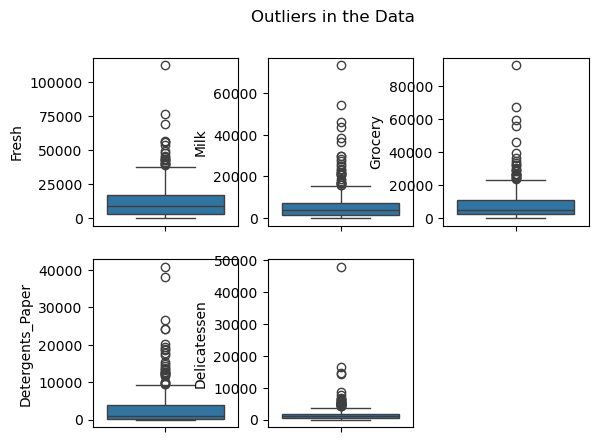

In [6]:
# Lets Visuvalize the outliers in the boxplot
plt.subplot(2,3,1)
sns.boxplot(data['Fresh'])

plt.subplot(2,3,2)
sns.boxplot(data['Milk'])

plt.subplot(2,3,3)
sns.boxplot(data['Grocery'])

plt.subplot(2,3,4)
sns.boxplot(data['Detergents_Paper'])

plt.subplot(2,3,5)
sns.boxplot(data['Delicatessen'])


plt.suptitle("Outliers in the Data")
plt.show()

In [7]:
data['Fresh'].describe()

count       440.000000
mean      12000.297727
std       12647.328865
min           3.000000
25%        3127.750000
50%        8504.000000
75%       16933.750000
max      112151.000000
Name: Fresh, dtype: float64

In [8]:
Q1 = 3127.750000
Q2 = 8504.000000
Q3 = 16933.750000

IQR = Q3 - Q1   # Inter Quartile Range
print(IQR)

lower_limit = Q1 - (1.5*IQR)   # lowerlimit
print(lower_limit)

upper_limit = Q3 + (1.5*IQR)     # upperlimit
print(upper_limit)

13806.0
-17581.25
37642.75


In [9]:
data[(data['Fresh']<lower_limit) | (data['Fresh']>upper_limit)]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
29,43088,2100,2609,1200,1107,823
39,56159,555,902,10002,212,2916
47,44466,54259,55571,7782,24171,6465
52,40721,3916,5876,532,2587,1278
87,43265,5025,8117,6312,1579,14351
103,56082,3504,8906,18028,1480,2498
125,76237,3473,7102,16538,778,918
129,42312,926,1510,1718,410,1819
176,45640,6958,6536,7368,1532,230
181,112151,29627,18148,16745,4948,8550


In [10]:
data['Fresh'] = data['Fresh'].clip(lower=-17581.25,upper=37642.75)
data['Fresh']

0      12669.00
1       7057.00
2       6353.00
3      13265.00
4      22615.00
         ...   
435    29703.00
436    37642.75
437    14531.00
438    10290.00
439     2787.00
Name: Fresh, Length: 440, dtype: float64

In [11]:
data['Milk'].describe()

count      440.000000
mean      5796.265909
std       7380.377175
min         55.000000
25%       1533.000000
50%       3627.000000
75%       7190.250000
max      73498.000000
Name: Milk, dtype: float64

In [12]:
Q1 = 1533.000000
Q2 = 3627.000000
Q3 = 7190.250000

IQR = Q3 - Q1   # Inter Quartile Range
print(IQR)

lower_limit = Q1 - (1.5*IQR)   # lowerlimit
print(lower_limit)

upper_limit = Q3 + (1.5*IQR)     # upperlimit
print(upper_limit)

5657.25
-6952.875
15676.125


In [13]:
data[(data['Milk']<lower_limit) | (data['Milk']>upper_limit)]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,26373.00,36423,22019,5154,4337,16523
28,4113.00,20484,25957,1158,8604,5206
38,4591.00,15729,16709,33,6956,433
45,5181.00,22044,21531,1740,7353,4985
47,37642.75,54259,55571,7782,24171,6465
49,4967.00,21412,28921,1798,13583,1163
56,4098.00,29892,26866,2616,17740,1340
61,35942.00,38369,59598,3254,26701,2017
65,85.00,20959,45828,36,24231,1423
85,16117.00,46197,92780,1026,40827,2944


In [14]:
data['Milk'] = data['Milk'].clip(lower=-6952.875,upper=15676.125)
data['Milk']

0       9656.0
1       9810.0
2       8808.0
3       1196.0
4       5410.0
        ...   
435    12051.0
436     1431.0
437    15488.0
438     1981.0
439     1698.0
Name: Milk, Length: 440, dtype: float64

In [15]:
data['Grocery'].describe()

count      440.000000
mean      7951.277273
std       9503.162829
min          3.000000
25%       2153.000000
50%       4755.500000
75%      10655.750000
max      92780.000000
Name: Grocery, dtype: float64

In [16]:
Q1 = 2153.000000
Q2 = 4755.500000
Q3 = 10655.750000
IQR = Q3 - Q1   # Inter Quartile Range
print(IQR)

lower_limit = Q1 - (1.5*IQR)   # lowerlimit
print(lower_limit)

upper_limit = Q3 + (1.5*IQR)     # upperlimit
print(upper_limit)

8502.75
-10601.125
23409.875


In [17]:
data[(data['Grocery']<lower_limit) | (data['Grocery']>upper_limit)]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
28,4113.00,15676.125,25957,1158,8604,5206
43,630.00,11095.000,23998,787,9529,72
47,37642.75,15676.125,55571,7782,24171,6465
49,4967.00,15676.125,28921,1798,13583,1163
56,4098.00,15676.125,26866,2616,17740,1340
61,35942.00,15676.125,59598,3254,26701,2017
65,85.00,15676.125,45828,36,24231,1423
77,12205.00,12697.000,28540,869,12034,1009
85,16117.00,15676.125,92780,1026,40827,2944
86,22925.00,15676.125,32114,987,20070,903


In [18]:
data['Grocery'] = data['Grocery'].clip(lower=-10601.125,upper=23409.875)
data['Grocery']

0       7561.000
1       9568.000
2       7684.000
3       4221.000
4       7198.000
         ...    
435    16027.000
436      764.000
437    23409.875
438     2232.000
439     2510.000
Name: Grocery, Length: 440, dtype: float64

In [19]:
data['Frozen'].describe()

count      440.000000
mean      3071.931818
std       4854.673333
min         25.000000
25%        742.250000
50%       1526.000000
75%       3554.250000
max      60869.000000
Name: Frozen, dtype: float64

In [20]:
Q1 = 742.250000
Q2 = 1526.000000
Q3 = 3554.250000

IQR = Q3 - Q1   # Inter Quartile Range
print(IQR)

lower_limit = Q1 - (1.5*IQR)   # lowerlimit
print(lower_limit)

upper_limit = Q3 + (1.5*IQR)     # upperlimit
print(upper_limit)

2812.0
-3475.75
7772.25


In [21]:
data[(data['Frozen']<lower_limit) | (data['Frozen']>upper_limit)]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
22,31276.00,1917.000,4469.000,9408,2381,4334
39,37642.75,555.000,902.000,10002,212,2916
40,24025.00,4332.000,4757.000,9510,1145,5864
47,37642.75,15676.125,23409.875,7782,24171,6465
70,16705.00,2037.000,3202.000,10643,116,1365
72,4420.00,5139.000,2661.000,8872,1321,181
73,19899.00,5332.000,8713.000,8132,764,648
88,7864.00,542.000,4042.000,9735,165,46
91,12754.00,2762.000,2530.000,8693,627,1117
93,11314.00,3090.000,2062.000,35009,71,2698


In [22]:
data['Frozen'] = data['Frozen'].clip(lower=-3475.75,upper=7772.25)
data['Frozen']

0       214.00
1      1762.00
2      2405.00
3      6404.00
4      3915.00
        ...   
435    7772.25
436    4510.00
437     437.00
438    1038.00
439      65.00
Name: Frozen, Length: 440, dtype: float64

In [23]:
data['Detergents_Paper'].describe()

count      440.000000
mean      2881.493182
std       4767.854448
min          3.000000
25%        256.750000
50%        816.500000
75%       3922.000000
max      40827.000000
Name: Detergents_Paper, dtype: float64

In [24]:
Q1 = 256.750000
Q2 =  816.500000
Q3 = 3922.000000

IQR = Q3 - Q1   # Inter Quartile Range
print(IQR)

lower_limit = Q1 - (1.5*IQR)   # lowerlimit
print(lower_limit)

upper_limit = Q3 + (1.5*IQR)     # upperlimit
print(upper_limit)

3665.25
-5241.125
9419.875


In [25]:
data[(data['Detergents_Paper']<lower_limit) | (data['Detergents_Paper']>upper_limit)]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
43,630.00,11095.000,23409.875,787.00,9529,72
47,37642.75,15676.125,23409.875,7772.25,24171,6465
49,4967.00,15676.125,23409.875,1798.00,13583,1163
56,4098.00,15676.125,23409.875,2616.00,17740,1340
61,35942.00,15676.125,23409.875,3254.00,26701,2017
65,85.00,15676.125,23409.875,36.00,24231,1423
77,12205.00,12697.000,23409.875,869.00,12034,1009
85,16117.00,15676.125,23409.875,1026.00,40827,2944
86,22925.00,15676.125,23409.875,987.00,20070,903
92,9198.00,15676.125,23409.875,3232.00,18906,5130


In [26]:
data['Detergents_Paper'] = data['Detergents_Paper'].clip(lower=-5241.125,upper=9419.875)
data['Detergents_Paper']

0      2674.000
1      3293.000
2      3516.000
3       507.000
4      1777.000
         ...   
435     182.000
436      93.000
437    9419.875
438     168.000
439     477.000
Name: Detergents_Paper, Length: 440, dtype: float64

In [27]:
data['Delicatessen'].describe()

count      440.000000
mean      1524.870455
std       2820.105937
min          3.000000
25%        408.250000
50%        965.500000
75%       1820.250000
max      47943.000000
Name: Delicatessen, dtype: float64

In [28]:
Q1 = 408.250000
Q2 = 965.500000
Q3 = 1820.250000

IQR = Q3 - Q1   # Inter Quartile Range
print(IQR)

lower_limit = Q1 - (1.5*IQR)   # lowerlimit
print(lower_limit)

upper_limit = Q3 + (1.5*IQR)     # upperlimit
print(upper_limit)

1412.0
-1709.75
3938.25


In [29]:
data[(data['Delicatessen']<lower_limit) | (data['Delicatessen']>upper_limit)]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
2,6353.00,8808.000,7684.000,2405.00,3516.000,7844
4,22615.00,5410.000,7198.000,3915.00,1777.000,5185
17,5876.00,6157.000,2933.000,839.00,370.000,4478
22,31276.00,1917.000,4469.000,7772.25,2381.000,4334
23,26373.00,15676.125,22019.000,5154.00,4337.000,16523
24,22647.00,9776.000,13792.000,2915.00,4482.000,5778
28,4113.00,15676.125,23409.875,1158.00,8604.000,5206
36,29955.00,4362.000,5428.000,1729.00,862.000,4626
40,24025.00,4332.000,4757.000,7772.25,1145.000,5864
45,5181.00,15676.125,21531.000,1740.00,7353.000,4985


In [30]:
data['Delicatessen'] = data['Delicatessen'].clip(lower=-1709.75,upper=3938.25)
data['Delicatessen']

0      1338.00
1      1776.00
2      3938.25
3      1788.00
4      3938.25
        ...   
435    2204.00
436    2346.00
437    1867.00
438    2125.00
439      52.00
Name: Delicatessen, Length: 440, dtype: float64

In [31]:
data.skew()

Fresh               1.108590
Milk                1.110755
Grocery             1.181371
Frozen              1.122389
Detergents_Paper    1.265726
Delicatessen        1.070487
dtype: float64

In [32]:
from scipy.stats import boxcox
data['Fresh'],_=boxcox(data['Fresh'])
data['Milk'],a=boxcox(data['Milk'])
data['Grocery'],b=boxcox(data['Grocery'])
data['Frozen'],c=boxcox(data['Frozen'])
data['Detergents_Paper'],d=boxcox(data['Detergents_Paper'])
data['Delicatessen'],e=boxcox(data['Delicatessen'])

In [33]:
data.skew()

Fresh              -0.119698
Milk               -0.046255
Grocery            -0.011838
Frozen             -0.057098
Detergents_Paper   -0.047003
Delicatessen       -0.079738
dtype: float64

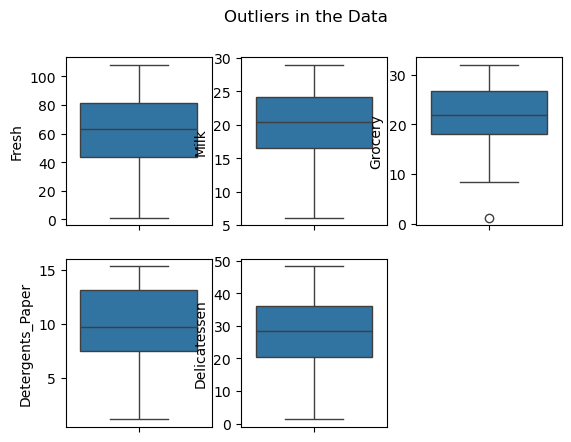

In [34]:
# Lets Visuvalize the outliers in the boxplot
plt.subplot(2,3,1)
sns.boxplot(data['Fresh'])

plt.subplot(2,3,2)
sns.boxplot(data['Milk'])

plt.subplot(2,3,3)
sns.boxplot(data['Grocery'])

plt.subplot(2,3,4)
sns.boxplot(data['Detergents_Paper'])

plt.subplot(2,3,5)
sns.boxplot(data['Delicatessen'])


plt.suptitle("Outliers in the Data")
plt.show()

In [35]:
x = data

# Elbow Curve

**Find the optimal number of clusters**

In [36]:
wcss = []

for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)

[367944.30637350277, 182089.15195474646, 131140.35759329636, 112499.04862460741, 96762.08465264094, 85485.49800157154, 78937.20755771146, 72101.35399956582, 67909.23332231186, 65014.85169853392]


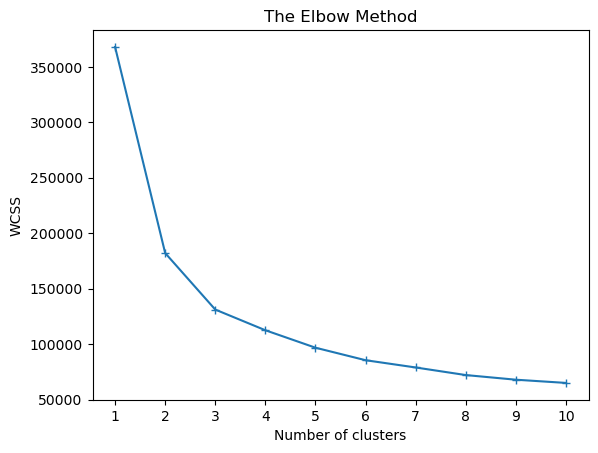

In [37]:
#Using the elbow method
plt.plot(range(1, 11),wcss,marker="+")
plt.xticks(range(1, 11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
         

**The elbow shows k = 3**

# K-Means Model

In [38]:
from sklearn.cluster import KMeans

# Modelling
kmeans = KMeans(n_clusters = 3, init = 'k-means++')


In [39]:
#  predict
y_kmeans= kmeans.fit_predict(x)

In [40]:
y_kmeans

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 2, 0,
       2, 2, 0, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       1, 2, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 1, 1, 0,
       2, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2,
       2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0,
       0, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1,

In [41]:
data['Km_cluster']=pd.DataFrame(y_kmeans)
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Km_cluster
0,73.189968,25.891182,24.564606,9.975590,12.263479,32.259724,2
1,59.236470,25.987931,25.978393,18.231780,12.743968,35.894813,2
2,57.016338,25.335074,24.659422,19.792354,12.897348,48.261786,2
3,74.410712,15.439661,21.334961,25.432011,8.779735,35.985684,2
4,90.094355,22.548908,24.277379,22.452484,11.350378,48.261786,1
...,...,...,...,...,...,...,...
435,99.300219,27.273832,29.316740,26.692042,6.916155,38.916972,1
436,108.036121,16.178144,13.756681,23.277604,5.798808,39.834060,1
437,76.889549,28.914329,31.995389,12.370957,15.335591,36.574210,1
438,67.903468,17.585441,18.206322,15.802083,6.778794,38.389977,2


In [42]:
kmeans.predict([[3435,29703,30243,1038,1777,1867]])

array([1])

In [43]:
# Apply K-Means with chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=True)
clusters = kmeans.fit_predict(x)

# Add cluster labels to your original DataFrame
data['Km_cluster'] = clusters

# Optional: Inspect cluster sizes
print(data['Km_cluster'].value_counts())


Km_cluster
2    193
1    126
0    121
Name: count, dtype: int64


**Visualize with PCA**

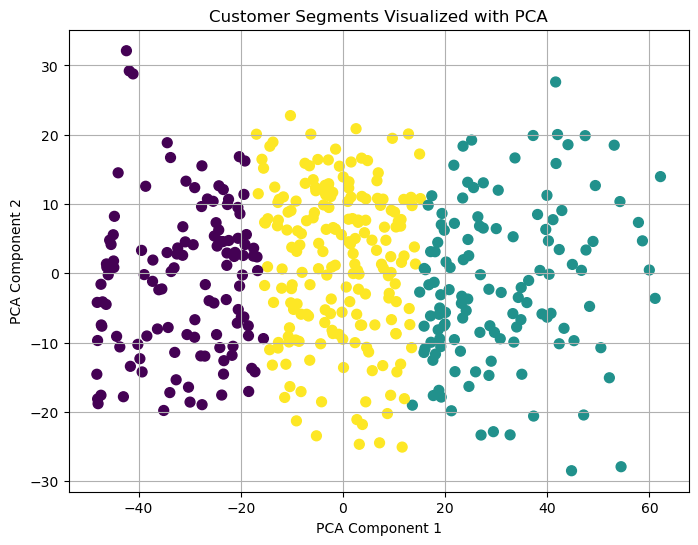

In [44]:
# Reduce dimensions for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


In [45]:
# Mean values per cluster
cluster_summary = data.groupby('Km_cluster').mean()
print(cluster_summary)


                Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
Km_cluster                                                                 
0           92.840240  20.430168  21.999241  20.527341          9.383065   
1           31.820630  21.198546  23.550046  15.126308         10.994682   
2           63.421533  19.925265  21.677907  18.077802          9.970394   

            Delicatessen  
Km_cluster                
0              33.354919  
1              25.696768  
2              26.981618  


# Cluster Strategy Summary
**Cluster 0:** High Fresh & Delicatessen Focus

- Customer Type: Restaurants, catering, niche food providers

- Strategy: Emphasize freshness, premium frozen supply, seasonal offerings, loyalty programs for perishables

**Cluster 1:** Grocery & Detergents Emphasis

- Customer Type: Cafés, convenience stores, small retailers

- Strategy: Push shelf-stable product bundles, cleaning supplies deals, restocking services

**Cluster 2:** Well-Rounded Moderate Buyers

- Customer Type: General retailers or delis

- Strategy: Offer flexibility, small-bulk promotions, cross-category discounts.